In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from numpy.linalg import pinv

import mdpy as mdp

In [40]:
# Define the problem
ns = 6
I = np.eye(ns)

# Gamma matrix
gm = np.ones(ns)*0.9
gm[0] = 0
G = np.diag(gm)

# Lambda matrix
lm = np.ones(ns)*0.0
L = np.diag(lm)

# Feature matrix
X = np.identity(ns)
ivec = np.ones(ns)

# Target policy transitions
P_pi = np.diag(np.ones(ns-1), 1)
P_pi[-1][0] = 1

# Behavior policy transitions
P_mu = np.array(
        [mdp.someones(ns, i+1) for i in range(0, ns//2)] + 
        [mdp.someones(ns, 0, i+1)*0.5 for i in range(ns//2, ns-1)] + 
        [mdp.someones(ns, 0)])

# D = np.diag(mdp.stationary(P))

r_pi = np.array([0.9, 0])

In [23]:
P_mu

array([[ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0.5,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0.5],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [24]:
P_pi

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.]])

In [31]:
G_pi = nx.DiGraph(P_pi)
colors = []
for i in G_pi:
    print(i)

0
1
2
3
4
5


In [18]:
G_pi.edges()

[(0, 1), (0, 5), (1, 2), (2, 3), (3, 4)]

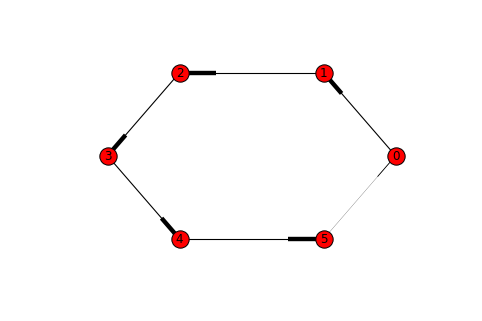

In [71]:
G_pi = nx.DiGraph(P_pi @ G + 0.2*P_pi)
edge_weights = [i[-1] for i in G_pi.edges(data='weight')]
nx.draw_circular(G_pi, with_labels=True, edge_cmap=plt.cm.Blues, width=edge_weights)

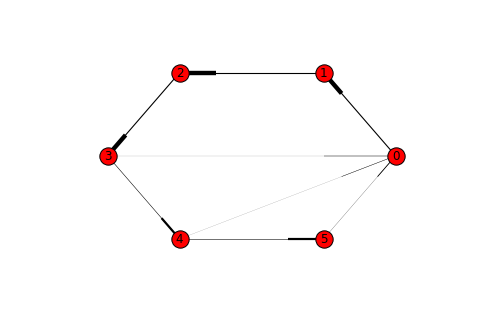

In [70]:
G_mu = nx.DiGraph(P_mu @ G + 0.2*P_mu)
edge_weights = [i[-1] for i in G_mu.edges(data='weight')]
nx.draw_circular(G_mu, with_labels=True, edge_cmap=plt.cm.Blues, width=edge_weights)

In [78]:
def draw_graph(pmat, gmat=None, **kwargs):
    """Draw representations of the MDP's transitions."""
    if gmat is None:
        gmat = np.eye(len(pmat))
    graph = nx.DiGraph(pmat @ gmat + 0.2*pmat)
    edge_weights = [i[-1] for i in graph.edges(data='weight')]
    options = dict( 
        edge_cmap=plt.cm.Blues,
        node_size = 500,
        width=edge_weights,
        with_labels=True,
    )
    options.update(**kwargs)
    nx.draw_circular(graph, **options)

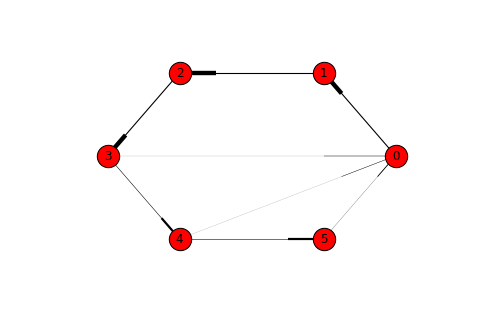

In [79]:
draw_graph(P_mu, G)

In [62]:
edge_weights = G_mu.edges(data='weight')

[(0, 1, 0.901),
 (1, 2, 0.901),
 (2, 3, 0.901),
 (3, 0, 0.0005),
 (3, 4, 0.4505),
 (4, 0, 0.0005),
 (4, 5, 0.4505),
 (5, 0, 0.001)]

In [58]:
{k for k in G_mu}

{0, 1, 2, 3, 4, 5}

In [46]:
plt.cm.Blues.from_list('hi', range(5))

ValueError: to_rgba: Invalid rgba arg "0"
to_rgb: Invalid rgb arg "0"
cannot convert argument to rgb sequence

In [36]:
mdp.linalg.approx_stationary([[0.1, 0.9], [0.5, 0.5]])

array([ 0.35714525,  0.64285475])

In [37]:
mdp.stationary(P)

array([ 0.35714286,  0.64285714])

In [38]:
mdp.potential(0.9*P)

array([[ 4.04411765,  5.95588235],
       [ 3.30882353,  6.69117647]])

In [39]:
I = np.eye(ns)

G = np.diag(np.ones(ns)*0.9)
L = np.diag(np.ones(ns)*0.0)
X = np.identity(ns)
ivec = np.ones(ns)
r = np.array([0.9, 0])

In [40]:
mdp.bellman(P, G, r)

array([ 3.63970588,  2.97794118])

In [41]:
mdp.least_squares(P, G, X, r)

array([ 3.63970588,  2.97794118])

In [42]:
mdp.td_solution(P, G, L, X, r)

array([ 3.63970588,  2.97794118])

In [43]:
mdp.etd_solution(P, G, L, X, ivec, r)

array([ 3.63970588,  2.97794118])

In [44]:
# The equation for TD(0)'s weights
pinv(X.T @ D @ mdp.potential(P @ G) @ X) @ X.T @ D @ r

array([ 0.819, -0.405])

In [45]:
# the equation for least squares weights
pinv(X.T @ D @ X) @ X.T @ D @ pinv(I - P @ G) @ r

array([ 3.63970588,  2.97794118])